In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
#plt.rcParams['figsize']=(20.0,10.0)

#Read the csv data
data = pd.read_csv('ex6data3.csv')
#print(data.shape)
data.head()

,X1,X2,y,Xval_1,Xval_2,yval
0,-0.15899,0.42398,1,-0.3531,-0.6739,0.0
1,-0.34793,0.47076,1,-0.2271,0.4473,1.0
2,-0.50461,0.35380,1,0.0929,-0.7535,0.0
3,-0.59677,0.11403,1,0.1482,-0.7185,0.0
4,-0.51843,-0.17252,1,-0.0015,0.1629,0.0


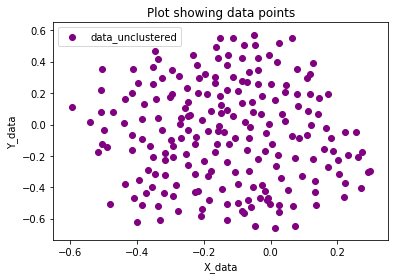

In [46]:
X = data.iloc[:, [0, 1]].values
#print(X)

#visualize unclustered data
plt.scatter(X[:,0],X[:,1],c='purple',label='data_unclustered')
plt.xlabel('X_data')
plt.ylabel('Y_data')
plt.legend()
plt.title('Plot showing data points')
plt.show()


In [26]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features.
n_iter=100  #choosing number of iterations
K=5         # choosing number of clusters

In [27]:
#first step involves iniitializaing centrouids randomly from the data points
Centroids=np.array([]).reshape(n,0) 

In [28]:
#the centroid becomes an n*K dimesional array, Each column for one cluster
for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [29]:
#compute the euclidian distance from the centroid and 
#assign the cluster based on the minimal distance
#output dictionary with cluster number as Keys and the data points 
Output={} # initializing output
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1 

In [64]:
#regroup the data points based on the cluster index
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [79]:
#repeat above 2 steps till convergence is achieved
for i in range(n_iter):
    
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
     
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y
#print(Output)

5
red cluster1
blue cluster2
green cluster3
cyan cluster4
magenta cluster5


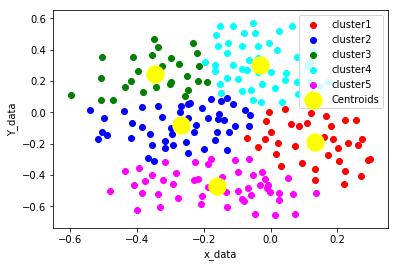

In [77]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
print(K)
for k in range(0,K):
    print(color[k],labels[k])
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
#     plt.scatter(Output['1'][:,0],Output['1'][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('x_data')
plt.ylabel('Y_data')
plt.legend()
plt.show()

In [78]:
#Read the second csv data
data2 = pd.read_csv('ex7data2.csv')
#print(data.shape)
data2.head()

,A,B
0,1.8421,4.6076
1,5.6586,4.8000
2,6.3526,3.2909
3,2.9040,4.6122
4,3.2320,4.9399


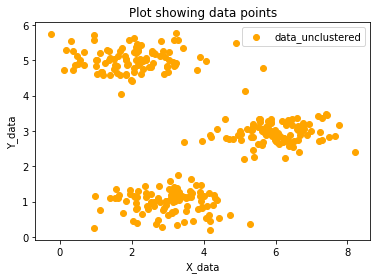

In [81]:
X = data2.iloc[:, [0, 1]].values
#print(X)

#visualize unclustered data
plt.scatter(X[:,0],X[:,1],c='orange',label='data_unclustered')
plt.xlabel('X_data')
plt.ylabel('Y_data')
plt.legend()
plt.title('Plot showing data points')
plt.show()

5
red cluster1
blue cluster2
green cluster3
cyan cluster4
magenta cluster5


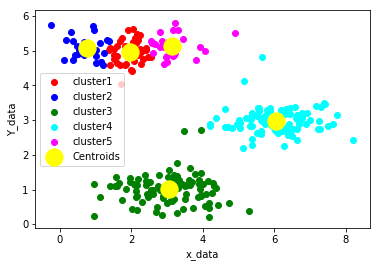

In [82]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features.
n_iter=100  #choosing number of iterations
K=5         # choosing number of clusters

#first step involves iniitializaing centrouids randomly from the data points
Centroids=np.array([]).reshape(n,0) 
#the centroid becomes an n*K dimesional array, Each column for one cluster
for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    
#compute the euclidian distance from the centroid and 
#assign the cluster based on the minimal distance
#output dictionary with cluster number as Keys and the data points 

Output={} # initializing output
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1 

#regroup the data points based on the cluster index
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
#repeat above 2 steps till convergence is achieved
for i in range(n_iter):
    
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
     
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y
#print(Output)

color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
print(K)
for k in range(0,K):
    print(color[k],labels[k])
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
#     plt.scatter(Output['1'][:,0],Output['1'][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('x_data')
plt.ylabel('Y_data')
plt.legend()
plt.show()